In [260]:
import warnings 
warnings.filterwarnings('ignore')

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
data = load_diabetes()
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [262]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [263]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=True)
df_vals = pt.fit_transform(df)
new = pd.DataFrame(df_vals,columns=df.columns)
new.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.787441,1.065488,1.272058,0.515094,-0.935289,-0.713523,-0.952943,0.083012,0.466711,-0.344072,0.163438
1,-0.094204,-0.938537,-1.159100,-0.514570,-0.118860,-0.353267,1.476064,-0.841899,-1.512908,-2.040460,-1.027849
2,1.936952,1.065488,0.984937,-0.056446,-0.968246,-0.698809,-0.651046,0.083012,0.115046,-0.524219,0.034644
3,-1.759671,-0.938537,-0.139725,-0.753484,0.317862,0.580687,-0.749635,0.824670,0.522762,-0.165986,0.783857
4,0.060102,-0.938537,-0.749303,0.515094,0.146087,0.391669,0.308719,0.083012,-0.648886,-0.983655,-0.045643


In [264]:
new['target'] = df['target']

<AxesSubplot:ylabel='Density'>

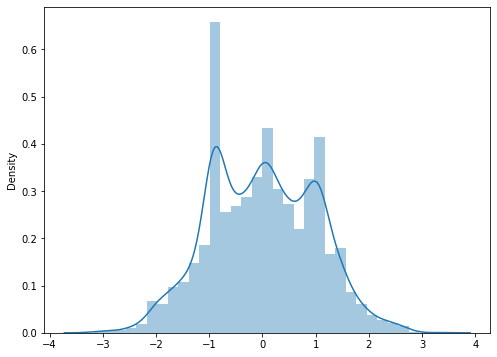

In [265]:
plt.figure(figsize=(8,6))
sns.distplot(new.drop('target',axis=1))

<AxesSubplot:ylabel='Density'>

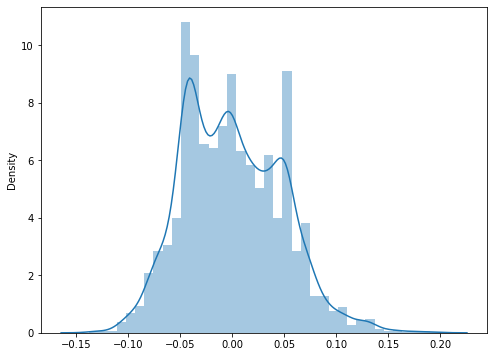

In [266]:
plt.figure(figsize=(8,6))
sns.distplot(df.drop('target',axis=1))

<AxesSubplot:ylabel='Density'>

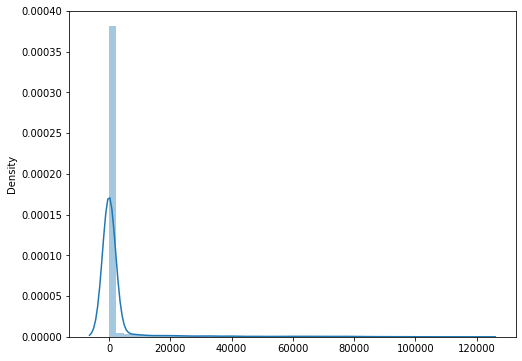

In [267]:
log_transformed = np.square(df)
plt.figure(figsize=(8,6))
sns.distplot(log_transformed)

<AxesSubplot:ylabel='Density'>

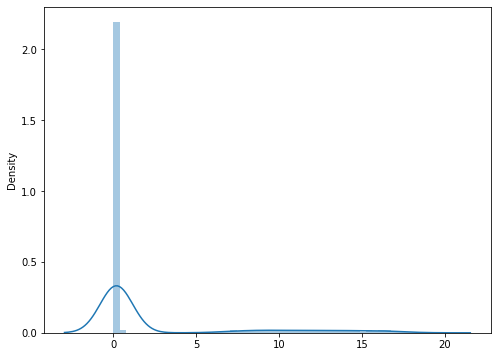

In [268]:
sqrt_transformed = np.sqrt(df)
plt.figure(figsize=(8,6))
sns.distplot(sqrt_transformed)

<AxesSubplot:>

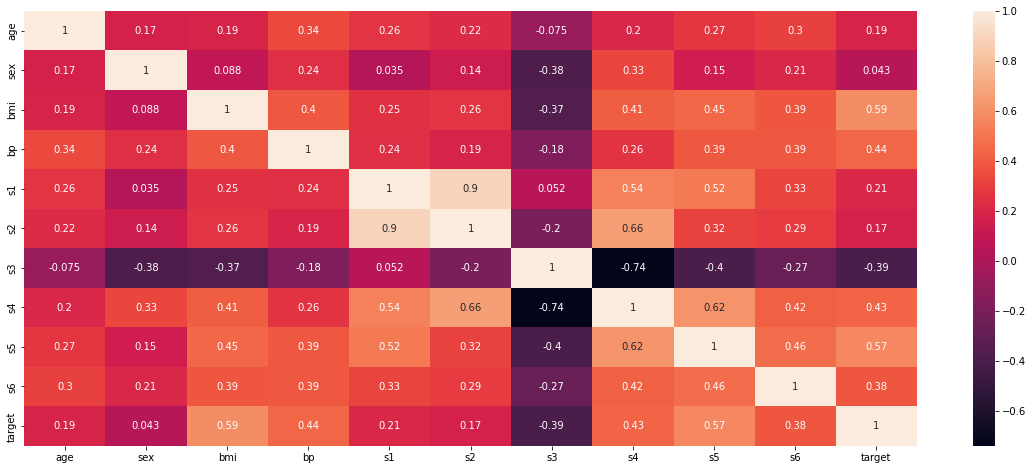

In [269]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

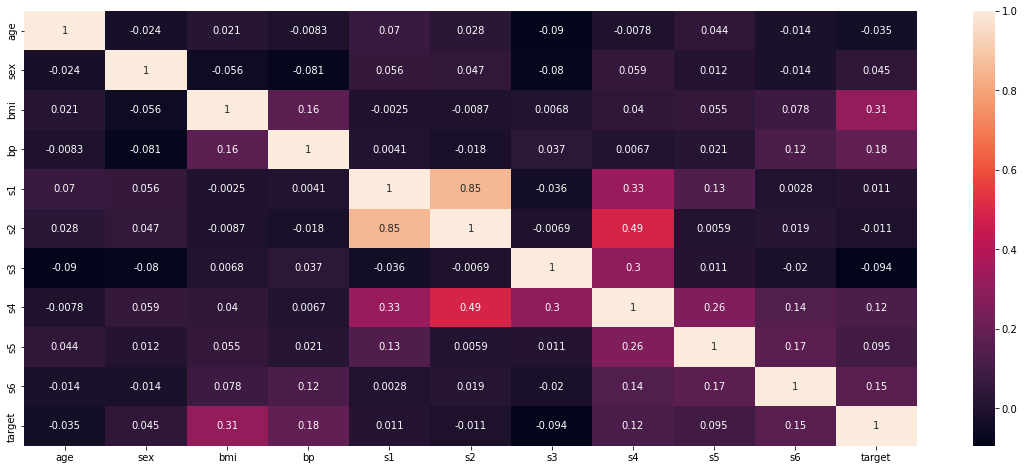

In [270]:
plt.figure(figsize=(20,8))
sns.heatmap(log_transformed.corr(),annot=True)

<AxesSubplot:>

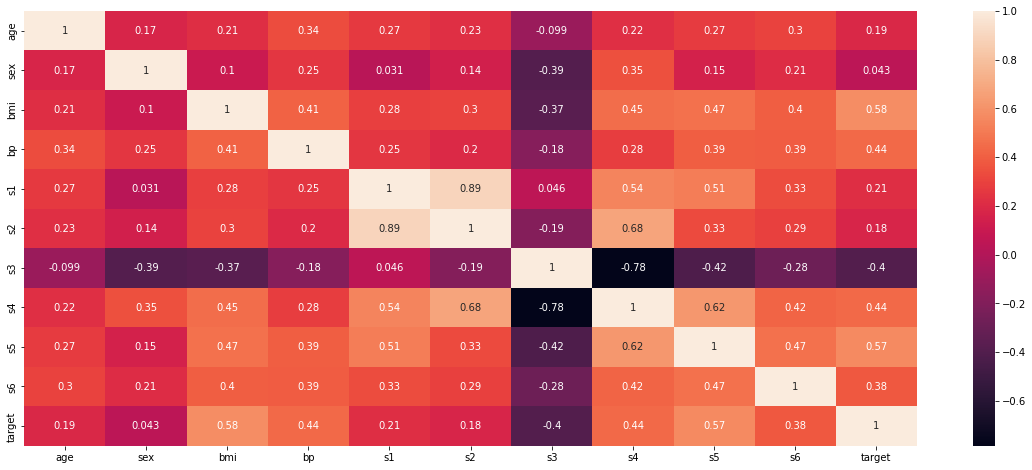

In [271]:
plt.figure(figsize=(20,8))
sns.heatmap(new.corr(),annot=True)

In [272]:
def outlier(df,feat):
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    IQR = q3-q1
    
    lower = q1-1.5*IQR
    upper = q3+1.5*IQR
    
    ls = df.index [ (df[feat]< lower) | (df[feat] > upper) ]
    return ls

In [273]:
index_list=[]

for feature in new.columns:                #### To be changed --> only remove outliers from price_per_sqft.
    index_list.extend(outlier(df,feature))
    
index_set=set(index_list)
index_list=list(index_set)

In [274]:
new.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.787441,1.065488,1.272058,0.515094,-0.935289,-0.713523,-0.952943,0.083012,0.466711,-0.344072,151.0
1,-0.094204,-0.938537,-1.159100,-0.514570,-0.118860,-0.353267,1.476064,-0.841899,-1.512908,-2.040460,75.0
2,1.936952,1.065488,0.984937,-0.056446,-0.968246,-0.698809,-0.651046,0.083012,0.115046,-0.524219,141.0
3,-1.759671,-0.938537,-0.139725,-0.753484,0.317862,0.580687,-0.749635,0.824670,0.522762,-0.165986,206.0
4,0.060102,-0.938537,-0.749303,0.515094,0.146087,0.391669,0.308719,0.083012,-0.648886,-0.983655,135.0


In [275]:
df.drop(index_list,axis=0,inplace=True)

In [276]:
X,y = df.drop(['target','s1'],axis=1),df.target

In [277]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [278]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

linear_regressor = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DtR = DecisionTreeRegressor()


linear_params = {'normalize':[True,False]}
linear_grid = GridSearchCV(linear_regressor,param_grid=linear_params,cv=2)

lasso_params = {'alpha': [0.1,0.25,0.5,1,2,5],'selection': ['random', 'cyclic'],'normalize':[True,False],'selection': ['random', 'cyclic']}
lasso_grid = GridSearchCV(lasso,param_grid=lasso_params,cv=2)

ridge_params = {'alpha': [0.1,0.25,0.5,1,2,5],'solver':['auto', 'svd', 'cholesky','lsqr'],'normalize':[True,False]}
ridge_grid = GridSearchCV(ridge,param_grid=ridge_params,cv=2)

DtR_params = {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random'],'max_depth':[10,15,20,25,30]}
DtR_grid = GridSearchCV(DtR,param_grid=DtR_params,cv=2)

In [279]:
linear_grid.fit(X_train,y_train)
lasso_grid.fit(X_train,y_train)
ridge_grid.fit(X_train,y_train)
DtR_grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'splitter': ['best', 'random']})

In [280]:
print('Best Linear_Regression Parameters : ',linear_grid.best_params_)
print('Best Linear_Regression Score : ',linear_grid.best_score_)

Best Linear_Regression Parameters :  {'normalize': True}
Best Linear_Regression Score :  0.48527529426824567


In [281]:
print('Best Lasso Parameters : ',lasso_grid.best_params_)
print('Best Lasso Score : ',lasso_grid.best_score_)

Best Lasso Parameters :  {'alpha': 0.1, 'normalize': True, 'selection': 'random'}
Best Lasso Score :  0.48754392895554793


In [282]:
print('Best Ridge_Regression Parameters : ',ridge_grid.best_params_)
print('Best Ridge_Regression Score : ',ridge_grid.best_score_)

Best Ridge_Regression Parameters :  {'alpha': 0.1, 'normalize': True, 'solver': 'auto'}
Best Ridge_Regression Score :  0.4932532278079654


In [283]:
print('Best DecisionTreeRegression Parameters : ',DtR_grid.best_params_)
print('Best DecisionTreeRegression Score : ',DtR_grid.best_score_)

Best DecisionTreeRegression Parameters :  {'criterion': 'mse', 'max_depth': 30, 'splitter': 'random'}
Best DecisionTreeRegression Score :  -0.004078796757029268


In [284]:
y_pred_lasso = lasso_grid.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lasso)

0.3865131470567932

In [285]:
y_pred_ridge = ridge_grid.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.39573317739435965

In [286]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_ridge)

51.529829234627044

In [287]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred_ridge,y_test))
np.sqrt(mean_squared_error(y_pred_ridge,y_test))

3806.6983603332774


61.69844698477651

In [288]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=3000,max_depth=25,max_samples=9,max_features=4)
RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features=4, max_samples=9,
                      n_estimators=3000)

In [289]:
from sklearn.metrics import mean_squared_error
y_pred_rf = RFR.predict(X_test)
print(mean_squared_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))
r2_score(y_test,y_pred_rf)

4267.17098396921
65.32358673533787


0.32263877830017795

In [290]:
from sklearn.svm import LinearSVR,SVR
reg = SVR(kernel='rbf')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.1149642259989132

In [291]:
print(mean_squared_error(y_pred,y_test))
np.sqrt(mean_squared_error(y_pred,y_test))

5575.457899870445


74.66898887671135

In [292]:
from sklearn.svm import LinearSVR,SVR
reg = SVR(kernel='poly')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.21870608613383946

In [293]:
from sklearn.svm import LinearSVR,SVR
reg = SVR(kernel='sigmoid')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.29383105905788953

In [294]:
print(mean_squared_error(y_pred,y_test))
np.sqrt(mean_squared_error(y_pred,y_test))

4448.650908899871


66.69820768881178